<a href="https://colab.research.google.com/github/Richaweb/mnistdata/blob/main/Non_Navies_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [54]:
data = pd.read_csv('/content/MNIST_train.csv')


In [56]:
data.shape

(60000, 787)

In [57]:
data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data.columns #reading the columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [59]:
data = data.drop(columns=['Unnamed: 0', 'index'], axis=1)

In [60]:
data.shape

(60000, 785)

In [61]:
x = data.to_numpy()

In [62]:
y =x[:,0]

In [64]:
y

array([5, 0, 4, ..., 5, 6, 8])

In [65]:
y.shape

(60000,)

In [66]:
x = x[:,1:]

In [67]:
x.shape

(60000, 784)

In [68]:
#Normalise the data
#data preprocessing

In [69]:
x = x/255

In [70]:
from scipy.stats import multivariate_normal as mvn

In [128]:
class GaussBayes():
  def fit(self, X, y, epsilone = 1.1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0),
                             "cov": (1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilone*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N,D =X.shape
    P_hat = np.zeros((N,len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)




In [129]:
gbays_non_naive = GaussBayes()

In [130]:
gbays_non_naive.fit(x,y)

In [131]:
y_hat2_gbays = gbays_non_naive.predict(x)

In [132]:
def accuracy(y,y_hat):# matrix
  return np.mean(y==y_hat2_gbays)

Text(0.5, 47.7222222222222, 'Predicted label')

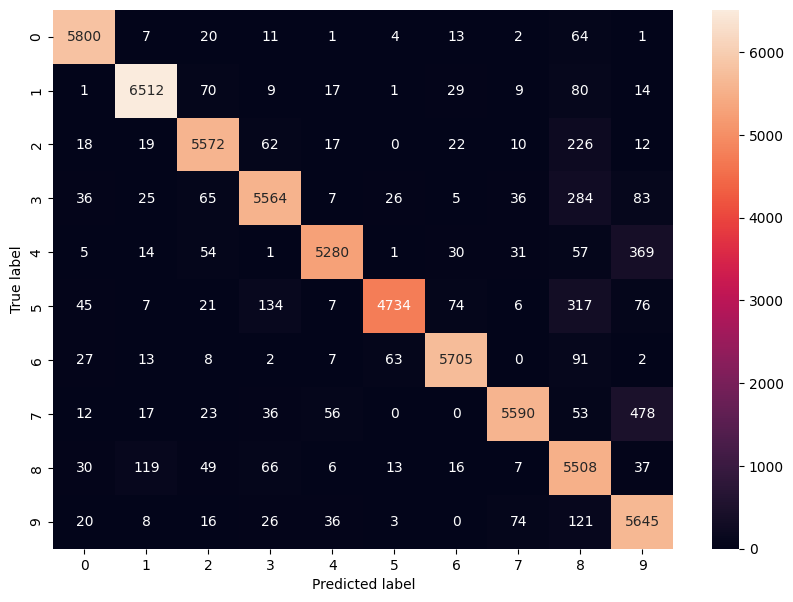

In [133]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat2_gbays, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [134]:
accuracy(y,y_hat2_gbays)

0.9318333333333333

Training a dataset on test data

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [97]:
datatest = pd.read_csv('/content/mnist_test.csv', header= None)

In [98]:
datatest.shape

(10000, 785)

In [99]:
datatest.columns #reading the columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
      dtype='int64', length=785)

In [101]:
#data = data.drop(columns=['Unnamed: 0', 'index'], axis=1)

In [102]:
datatest.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
datatest.shape

(10000, 785)

In [104]:
X_test = data.to_numpy()

In [105]:
y_test= X_test[:,0]

In [106]:
X_test = X_test[:,1:]

In [107]:
y_test.shape

(60000,)

In [108]:
y_test

array([5, 0, 4, ..., 5, 6, 8])

In [109]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [110]:
X_test= X_test/255 #normalise the dataset

In [111]:
from scipy.stats import multivariate_normal as mvn

In [120]:
class GaussBayes():
  def fit(self, X, y, epsilone =1.1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0),
                             "cov": (1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilone*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N,D =X.shape
    P_hat = np.zeros((N,len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)



In [121]:
gbays_non_naive = GaussBayes()

In [122]:
gbays_non_naive = GaussBayes()

In [123]:
gbays_non_naive.fit(X_test,y_test)

In [124]:
y_hat2_gbays = gbays_non_naive.predict(X_test)

In [125]:
def accuracy(y,y_hat):# matrix
  return np.mean(y==y_hat)

Text(0.5, 47.7222222222222, 'Predicted label')

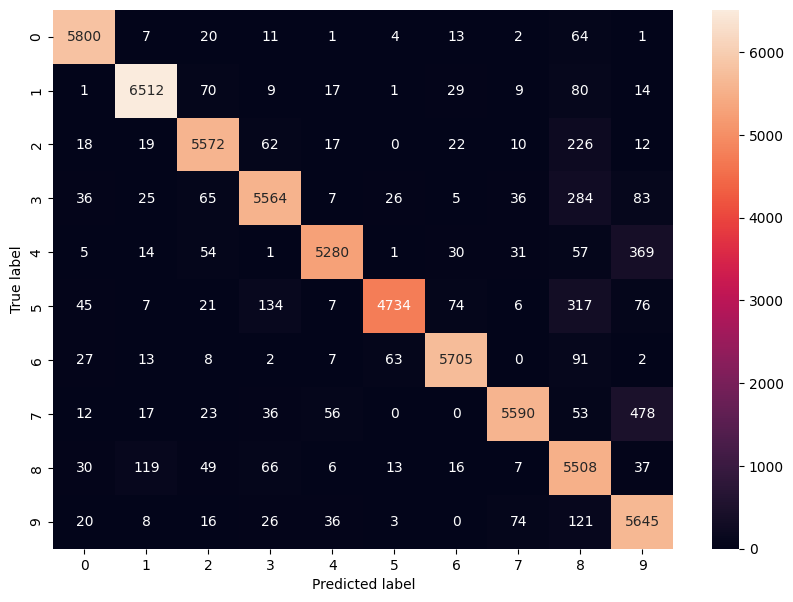

In [126]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat2_gbays, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [127]:
accuracy(y_test,y_hat2_gbays)

0.9318333333333333